In [1]:
import pandas as pd
import sys
import os
import warnings
from sklearn.pipeline import Pipeline

warnings.filterwarnings("ignore", category=FutureWarning)
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..", "src")))


from visualizations import (
    plot_label_distribution,
    plot_most_common_words,
    plot_histograms,
    plot_most_common_words_per_label,
    plot_column_vs_label,
    plot_top_languages,
    plot_sentiment_vs_label,
    plot_feature_correlation_with_labels
)
from preprocessing import (
    TweetFeatureExtractor,
    LanguageDetector,
    SentimentScorer,
    EnglishSelector,
    TweetExploder,
    map_labels,
)

DATA_PATH = "../data"

## **TwiBot-20**


### **Tweets**

**Description**
- ```ID```: the ID from Twitter identifying the user.
- ```profile```: the profile information obtained from Twitter API.
- ```tweet```: the recent 200 tweets of this user.
- ```neighbor```: the random 20 followers and followings of this user.
- ```domain```: the domain of this user and the domains include politics, business, entertainment and sports.
- ```label```: the label of this user and '1' means it is a bot while '0' means it is a human.

In [2]:
df = pd.read_json(DATA_PATH + "/TwiBot20/tweets/train.json")
df = map_labels(df)

In [3]:
df.head()

,ID,profile,tweet,neighbor,domain,label,label_text
0,17461978,"{'id': '17461978 ', 'id_str': '17461978 ', 'na...",[RT @CarnivalCruise: 🎉 Are you ready to see wh...,None,"[Politics, Business, Entertainment]",0,Human
1,1297437077403885568,"{'id': '1297437077403885568 ', 'id_str': '1297...",None,"{'following': ['170861207', '23970102', '47293...",[Politics],1,Bot
2,17685258,"{'id': '17685258 ', 'id_str': '17685258 ', 'na...",[RT @realDonaldTrump: THANK YOU #RNC2020! http...,"{'following': ['46464108', '21536398', '186434...","[Politics, Entertainment, Sports]",0,Human
3,15750898,"{'id': '15750898 ', 'id_str': '15750898 ', 'na...",[A family fears they may have been cheated out...,"{'following': ['2324715174', '24030137', '2336...",[Politics],0,Human
4,1659167666,"{'id': '1659167666 ', 'id_str': '1659167666 ',...",[RT @VonteThePlug: Yeah but he ain’t got one h...,"{'following': ['1628313708', '726405625', '130...",[Politics],1,Bot


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8278 entries, 0 to 8277
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          8278 non-null   int64 
 1   profile     8278 non-null   object
 2   tweet       8223 non-null   object
 3   neighbor    7524 non-null   object
 4   domain      8278 non-null   object
 5   label       8278 non-null   int64 
 6   label_text  8278 non-null   object
dtypes: int64(2), object(5)
memory usage: 452.8+ KB


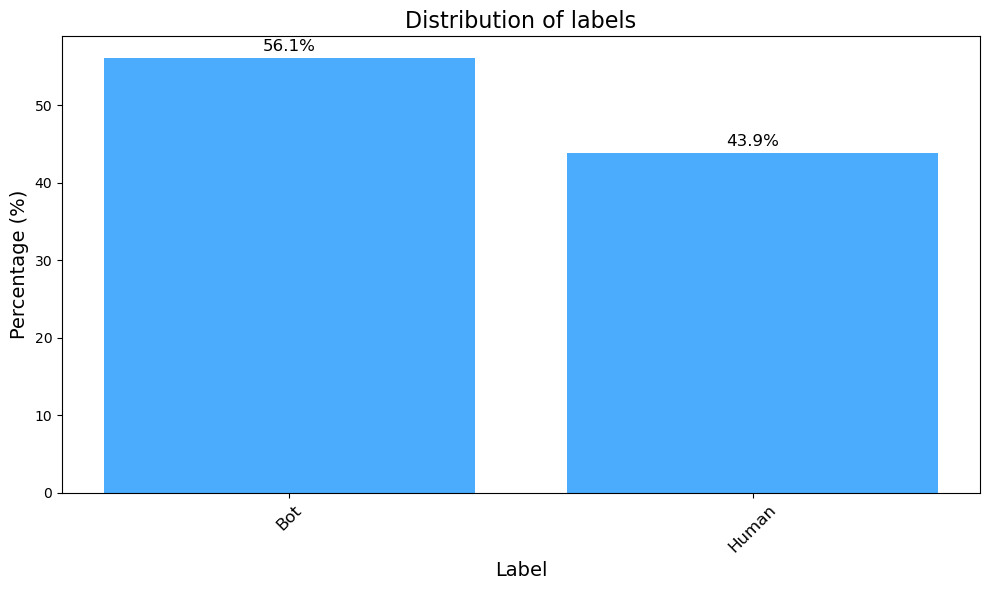

In [5]:
plot_label_distribution(df)

In [6]:
pipeline = Pipeline(
    steps=[
        ("tweets_exploder", TweetExploder()),
        ("language_detector", LanguageDetector()),
    ]
)

In [7]:
df = pipeline.transform(df)

100%|██████████| 1398465/1398465 [01:43<00:00, 13532.60it/s]


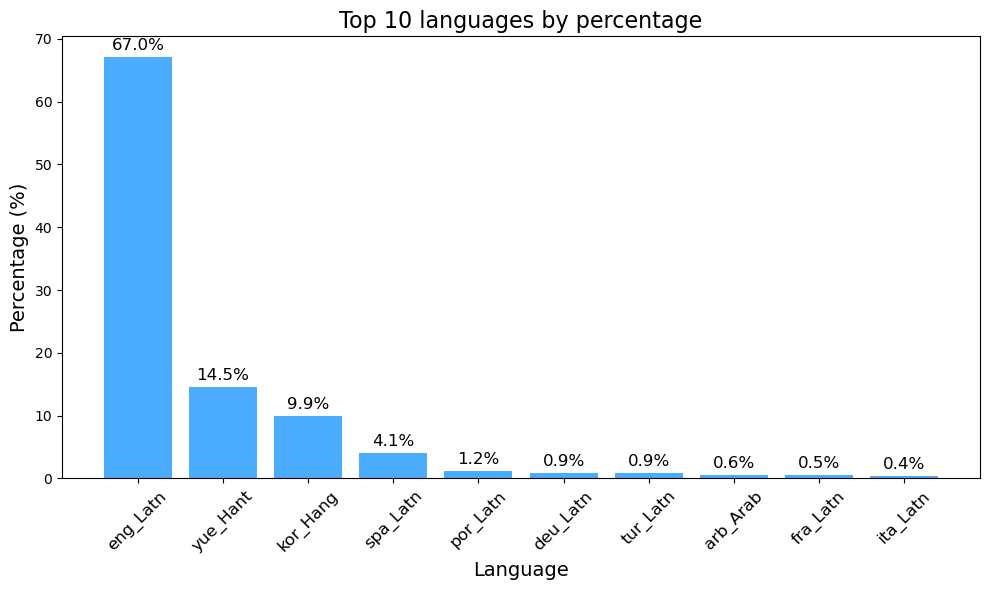

In [8]:
plot_top_languages(df)

67 % of tweets are in English, for further analysis, we only keep the tweets in English.

In [9]:
pipeline = Pipeline(
    steps=[
        ("english_selector", EnglishSelector()),
        ("feature_extractor", TweetFeatureExtractor()),
    ]
)

In [10]:
df = pipeline.transform(df)

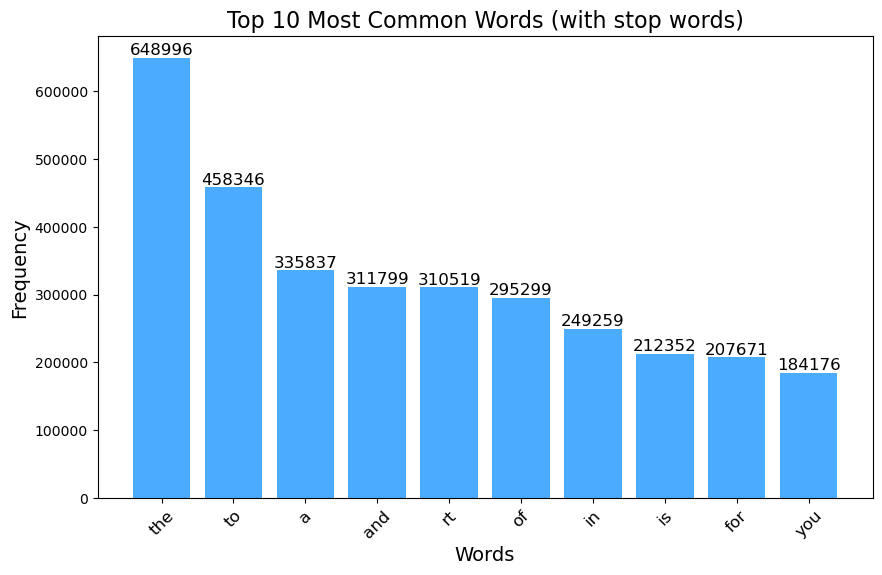

In [11]:
plot_most_common_words(df, include_stopwords=True)

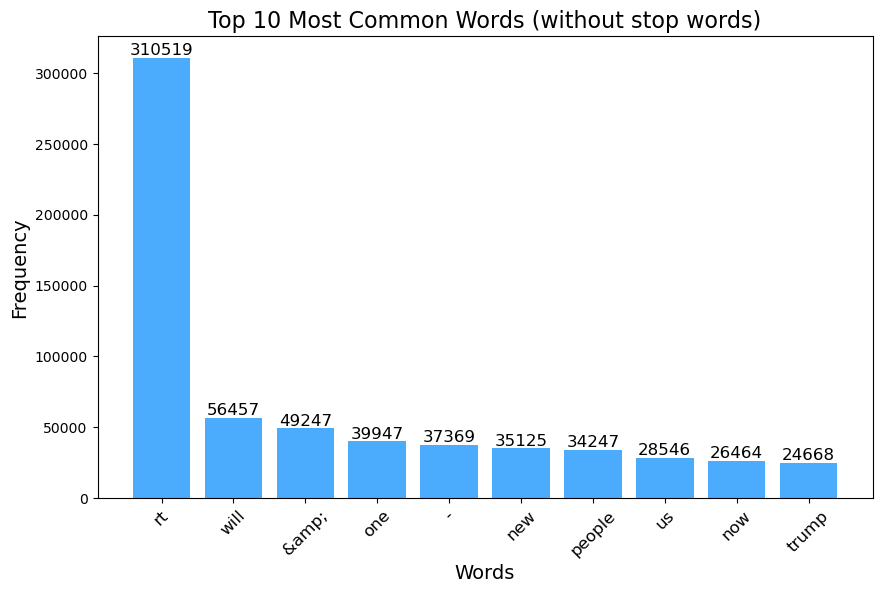

In [12]:
plot_most_common_words(df, include_stopwords=False)

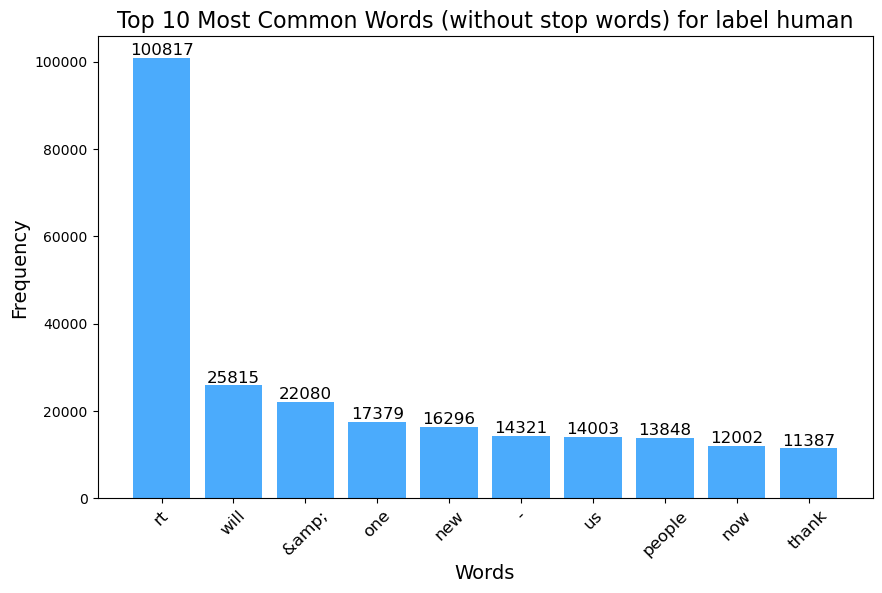

In [13]:
plot_most_common_words_per_label(df, label="human")

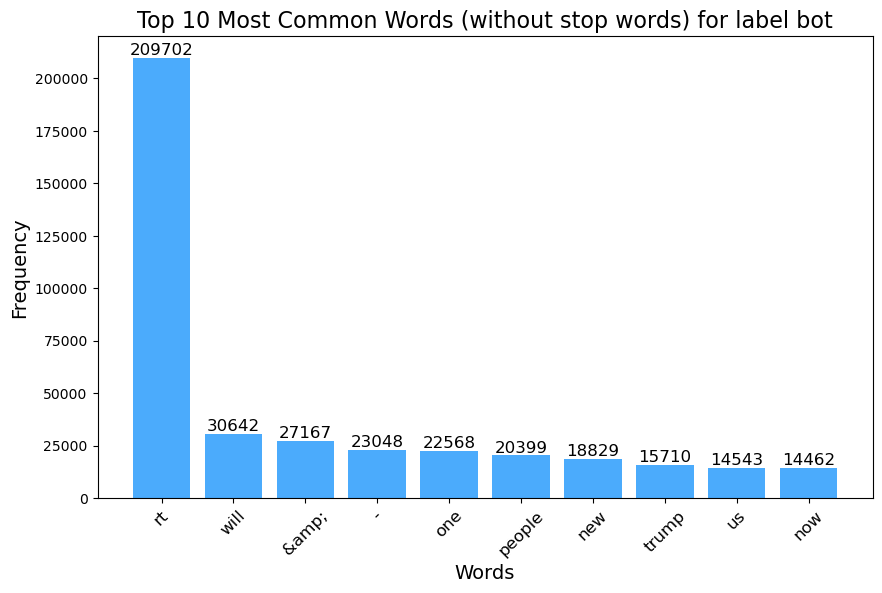

In [14]:
plot_most_common_words_per_label(df, label="bot")

In [15]:
df.head()

,ID,profile,tweet,neighbor,domain,label,label_text,language,word_count,character_count,hashtag_count,mention_count,link_count,emoji_count
0,17461978,"{'id': '17461978 ', 'id_str': '17461978 ', 'na...",RT @CarnivalCruise: 🎉 Are you ready to see wha...,None,"[Politics, Business, Entertainment]",0,Human,eng_Latn,27,141,0,1,0,2
1,17461978,"{'id': '17461978 ', 'id_str': '17461978 ', 'na...",Who has time for receipts? Not me. @epson rece...,None,"[Politics, Business, Entertainment]",0,Human,eng_Latn,24,159,0,1,2,0
2,17461978,"{'id': '17461978 ', 'id_str': '17461978 ', 'na...",Steady wants to encourage you to invest in you...,None,"[Politics, Business, Entertainment]",0,Human,eng_Latn,43,305,1,1,2,0
3,17461978,"{'id': '17461978 ', 'id_str': '17461978 ', 'na...","Good one, @rishid. But let’s see if y'all can ...",None,"[Politics, Business, Entertainment]",0,Human,eng_Latn,24,168,2,1,2,0
4,17461978,"{'id': '17461978 ', 'id_str': '17461978 ', 'na...",#lsunationalchamps\n,None,"[Politics, Business, Entertainment]",0,Human,eng_Latn,1,19,1,0,0,0


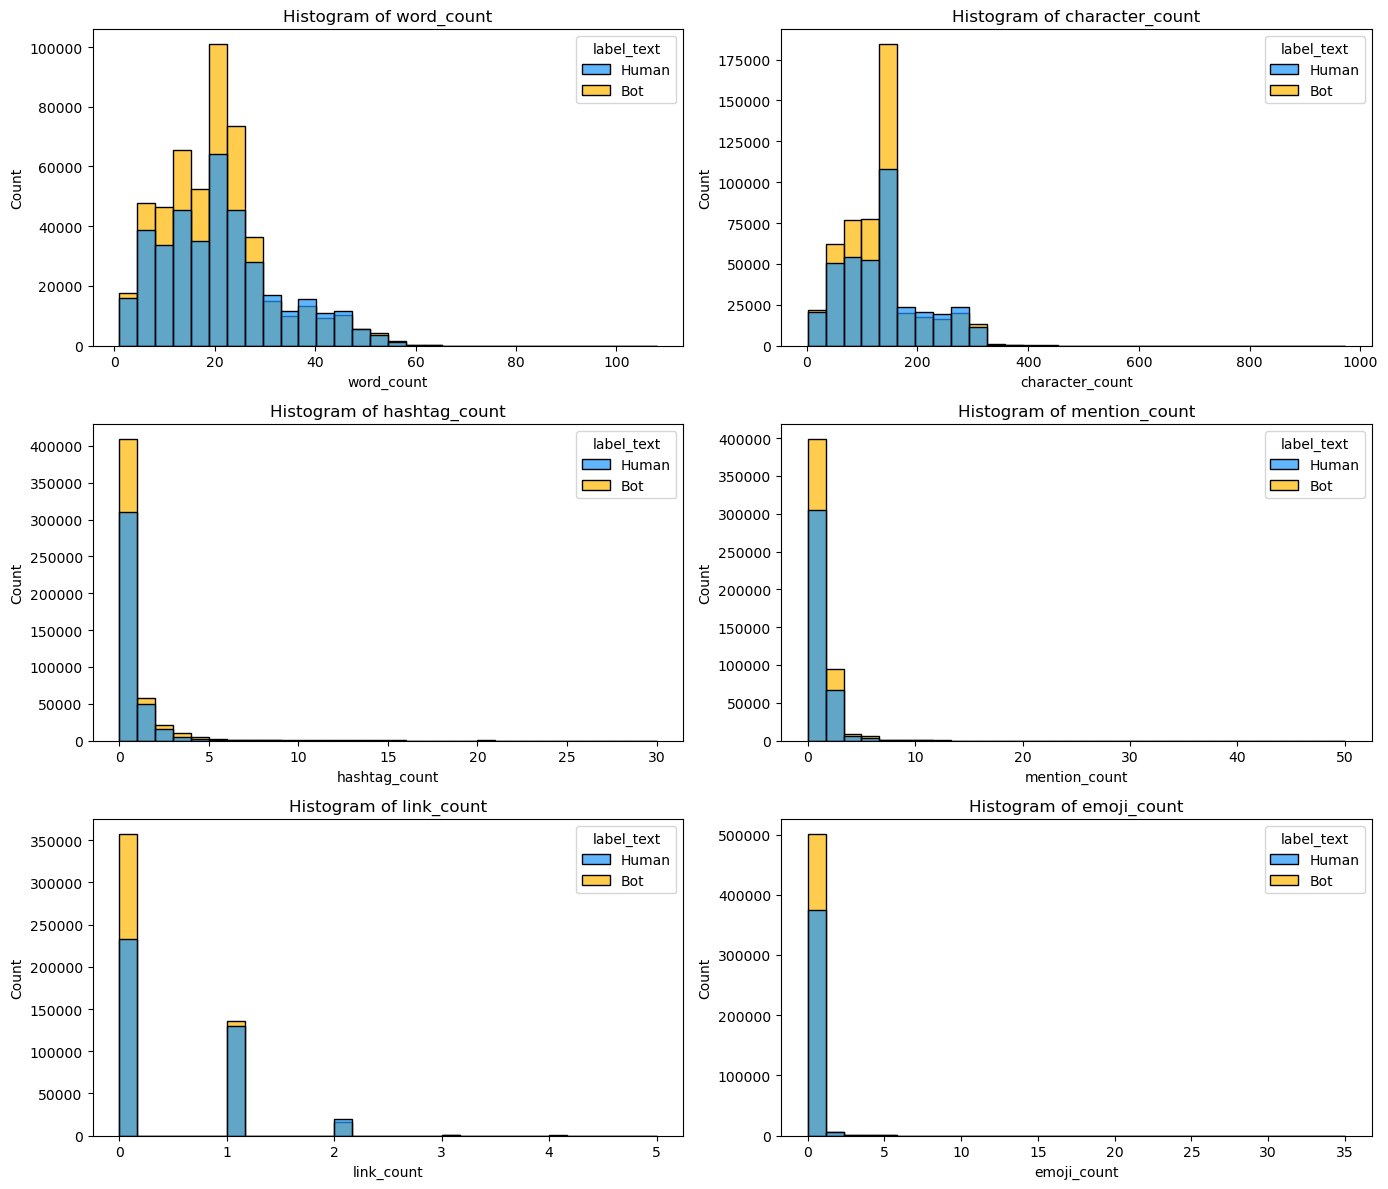

In [16]:
plot_histograms(df, by_label=True)

In [17]:
df_sample = df.groupby("label", group_keys=False).apply(
    lambda x: x.sample(frac=0.03, random_state=42), include_groups=True
)

/var/folders/_v/4k21rlg50554wrw2tvrdh5xr0000gn/T/ipykernel_31029/477650539.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_sample = df.groupby("label", group_keys=False).apply(


In [18]:
sentiment_scorer = SentimentScorer()

df_sentiment = sentiment_scorer.transform(df_sample)

100%|██████████| 26803/26803 [19:38<00:00, 22.73it/s]


In [19]:
df_sentiment.head()

,ID,profile,tweet,neighbor,domain,label,label_text,language,word_count,character_count,hashtag_count,mention_count,link_count,emoji_count,sentiment
359776,715851056148791296,"{'id': '715851056148791296 ', 'id_str': '71585...",RT @JerotichSeii: The #Covid19Millionaires gra...,"{'following': ['36670025', '20226908', '117102...",[Politics],0,Human,eng_Latn,19,144,1,1,0,0,neutral
671173,732760581569019904,"{'id': '732760581569019904 ', 'id_str': '73276...",Is it just me or are Monday’s just a synonym f...,"{'following': ['210998978', '49982906', '22418...",[Business],0,Human,eng_Latn,18,118,1,1,1,0,negative
864258,274057120,"{'id': '274057120 ', 'id_str': '274057120 ', '...",Three seasons without a trophy for @ManUtd for...,"{'following': ['1059364494', '221411491', '195...","[Entertainment, Sports]",0,Human,eng_Latn,12,73,0,1,0,0,negative
1165992,36444204,"{'id': '36444204 ', 'id_str': '36444204 ', 'na...","RT @RobertMackey: Imagine a world where, when ...","{'following': ['18555793', '366970233', '34240...",[Sports],0,Human,eng_Latn,24,140,0,1,0,0,neutral
97034,344801362,"{'id': '344801362 ', 'id_str': '344801362 ', '...",🔙 from the international break. 🔙 to league ac...,None,"[Politics, Entertainment, Sports]",0,Human,eng_Latn,16,129,0,2,1,4,neutral


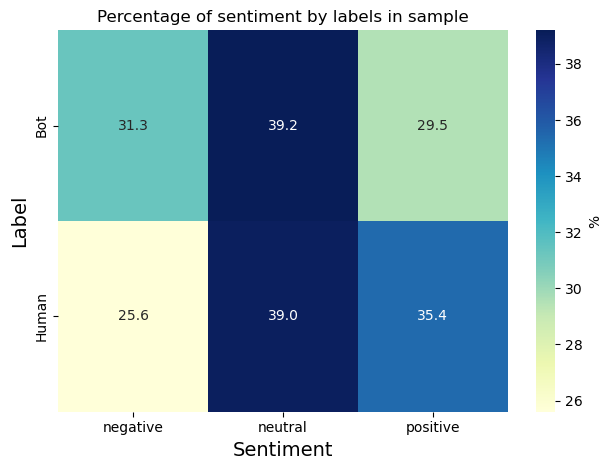

In [20]:
plot_sentiment_vs_label(df_sentiment)

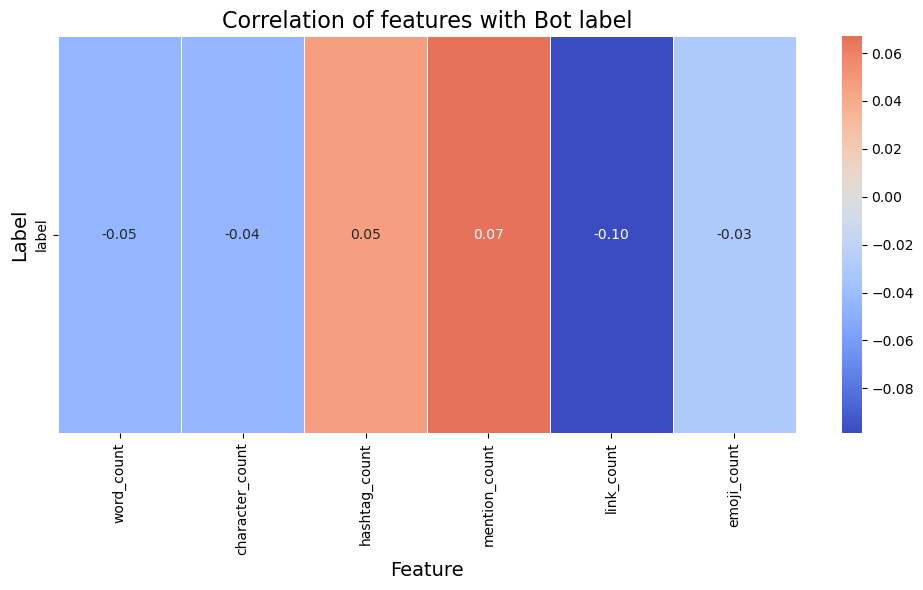

In [21]:
cols_to_plot_corr = ["word_count", "character_count", "hashtag_count", "mention_count", "link_count", "emoji_count"]
plot_feature_correlation_with_labels(df, cols_to_plot_corr)

In [22]:
train_profile = pd.json_normalize(df["profile"])

In [23]:
train_profile.head()

,id,id_str,name,screen_name,location,profile_location,description,url,entities,protected,...,profile_image_url,profile_image_url_https,profile_link_color,profile_sidebar_border_color,profile_sidebar_fill_color,profile_text_color,profile_use_background_image,has_extended_profile,default_profile,default_profile_image
0,17461978,17461978,SHAQ,SHAQ,"Orlando, FL","{'id': '55b4f9e5c516e0b6', 'url': 'https://api...","VERY QUOTATIOUS, I PERFORM RANDOM ACTS OF SHAQ...",https://t.co/7hsiK8cCKW,{'url': {'urls': [{'url': 'https://t.co/7hsiK8...,False,...,http://pbs.twimg.com/profile_images/1673907275...,https://pbs.twimg.com/profile_images/167390727...,2FC2EF,181A1E,252429,666666,True,False,False,False
1,17461978,17461978,SHAQ,SHAQ,"Orlando, FL","{'id': '55b4f9e5c516e0b6', 'url': 'https://api...","VERY QUOTATIOUS, I PERFORM RANDOM ACTS OF SHAQ...",https://t.co/7hsiK8cCKW,{'url': {'urls': [{'url': 'https://t.co/7hsiK8...,False,...,http://pbs.twimg.com/profile_images/1673907275...,https://pbs.twimg.com/profile_images/167390727...,2FC2EF,181A1E,252429,666666,True,False,False,False
2,17461978,17461978,SHAQ,SHAQ,"Orlando, FL","{'id': '55b4f9e5c516e0b6', 'url': 'https://api...","VERY QUOTATIOUS, I PERFORM RANDOM ACTS OF SHAQ...",https://t.co/7hsiK8cCKW,{'url': {'urls': [{'url': 'https://t.co/7hsiK8...,False,...,http://pbs.twimg.com/profile_images/1673907275...,https://pbs.twimg.com/profile_images/167390727...,2FC2EF,181A1E,252429,666666,True,False,False,False
3,17461978,17461978,SHAQ,SHAQ,"Orlando, FL","{'id': '55b4f9e5c516e0b6', 'url': 'https://api...","VERY QUOTATIOUS, I PERFORM RANDOM ACTS OF SHAQ...",https://t.co/7hsiK8cCKW,{'url': {'urls': [{'url': 'https://t.co/7hsiK8...,False,...,http://pbs.twimg.com/profile_images/1673907275...,https://pbs.twimg.com/profile_images/167390727...,2FC2EF,181A1E,252429,666666,True,False,False,False
4,17461978,17461978,SHAQ,SHAQ,"Orlando, FL","{'id': '55b4f9e5c516e0b6', 'url': 'https://api...","VERY QUOTATIOUS, I PERFORM RANDOM ACTS OF SHAQ...",https://t.co/7hsiK8cCKW,{'url': {'urls': [{'url': 'https://t.co/7hsiK8...,False,...,http://pbs.twimg.com/profile_images/1673907275...,https://pbs.twimg.com/profile_images/167390727...,2FC2EF,181A1E,252429,666666,True,False,False,False


In [24]:
train_profile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 893434 entries, 0 to 893433
Data columns (total 38 columns):
 #   Column                              Non-Null Count   Dtype 
---  ------                              --------------   ----- 
 0   id                                  893434 non-null  object
 1   id_str                              893434 non-null  object
 2   name                                893434 non-null  object
 3   screen_name                         893434 non-null  object
 4   location                            893434 non-null  object
 5   profile_location                    893434 non-null  object
 6   description                         893434 non-null  object
 7   url                                 893434 non-null  object
 8   entities                            893434 non-null  object
 9   protected                           893434 non-null  object
 10  followers_count                     893434 non-null  object
 11  friends_count                       893

In [25]:
print(train_profile.columns.to_list())

['id', 'id_str', 'name', 'screen_name', 'location', 'profile_location', 'description', 'url', 'entities', 'protected', 'followers_count', 'friends_count', 'listed_count', 'created_at', 'favourites_count', 'utc_offset', 'time_zone', 'geo_enabled', 'verified', 'statuses_count', 'lang', 'contributors_enabled', 'is_translator', 'is_translation_enabled', 'profile_background_color', 'profile_background_image_url', 'profile_background_image_url_https', 'profile_background_tile', 'profile_image_url', 'profile_image_url_https', 'profile_link_color', 'profile_sidebar_border_color', 'profile_sidebar_fill_color', 'profile_text_color', 'profile_use_background_image', 'has_extended_profile', 'default_profile', 'default_profile_image']


In [26]:
train_combined = pd.concat([df.drop(columns=["profile"]), train_profile], axis=1)

In [27]:
train_combined.head()

,ID,tweet,neighbor,domain,label,label_text,language,word_count,character_count,hashtag_count,...,profile_image_url,profile_image_url_https,profile_link_color,profile_sidebar_border_color,profile_sidebar_fill_color,profile_text_color,profile_use_background_image,has_extended_profile,default_profile,default_profile_image
0,17461978.0,RT @CarnivalCruise: 🎉 Are you ready to see wha...,None,"[Politics, Business, Entertainment]",0.0,Human,eng_Latn,27.0,141.0,0.0,...,http://pbs.twimg.com/profile_images/1673907275...,https://pbs.twimg.com/profile_images/167390727...,2FC2EF,181A1E,252429,666666,True,False,False,False
1,17461978.0,Who has time for receipts? Not me. @epson rece...,None,"[Politics, Business, Entertainment]",0.0,Human,eng_Latn,24.0,159.0,0.0,...,http://pbs.twimg.com/profile_images/1673907275...,https://pbs.twimg.com/profile_images/167390727...,2FC2EF,181A1E,252429,666666,True,False,False,False
2,17461978.0,Steady wants to encourage you to invest in you...,None,"[Politics, Business, Entertainment]",0.0,Human,eng_Latn,43.0,305.0,1.0,...,http://pbs.twimg.com/profile_images/1673907275...,https://pbs.twimg.com/profile_images/167390727...,2FC2EF,181A1E,252429,666666,True,False,False,False
3,17461978.0,"Good one, @rishid. But let’s see if y'all can ...",None,"[Politics, Business, Entertainment]",0.0,Human,eng_Latn,24.0,168.0,2.0,...,http://pbs.twimg.com/profile_images/1673907275...,https://pbs.twimg.com/profile_images/167390727...,2FC2EF,181A1E,252429,666666,True,False,False,False
4,17461978.0,#lsunationalchamps\n,None,"[Politics, Business, Entertainment]",0.0,Human,eng_Latn,1.0,19.0,1.0,...,http://pbs.twimg.com/profile_images/1673907275...,https://pbs.twimg.com/profile_images/167390727...,2FC2EF,181A1E,252429,666666,True,False,False,False


In [28]:
train_combined.groupby("verified").mean(numeric_only=True).T

verified,False,True
ID,1.820107e+17,1.793118e+17
label,5.126474e-01,4.155994e-01
word_count,2.067893e+01,2.089814e+01
character_count,1.341699e+02,1.361899e+02
hashtag_count,3.729923e-01,4.153028e-01
mention_count,1.034065e+00,9.957288e-01
link_count,4.133292e-01,4.509495e-01
emoji_count,1.437542e-01,1.590606e-01


Verified accounts have on average:
- more words, characters, negative words
- a lot more mentions, links, emojis, positive words
- less hashtags.

In [29]:
train_combined["followers_count"] = pd.to_numeric(
    train_combined["followers_count"], errors="coerce"
)

In [30]:
train_combined["followers_count"].dtype

dtype('float64')

In [31]:
train_combined.groupby("verified")["followers_count"].sum()

verified
False     1.682209e+10
True      6.306330e+11
Name: followers_count, dtype: float64

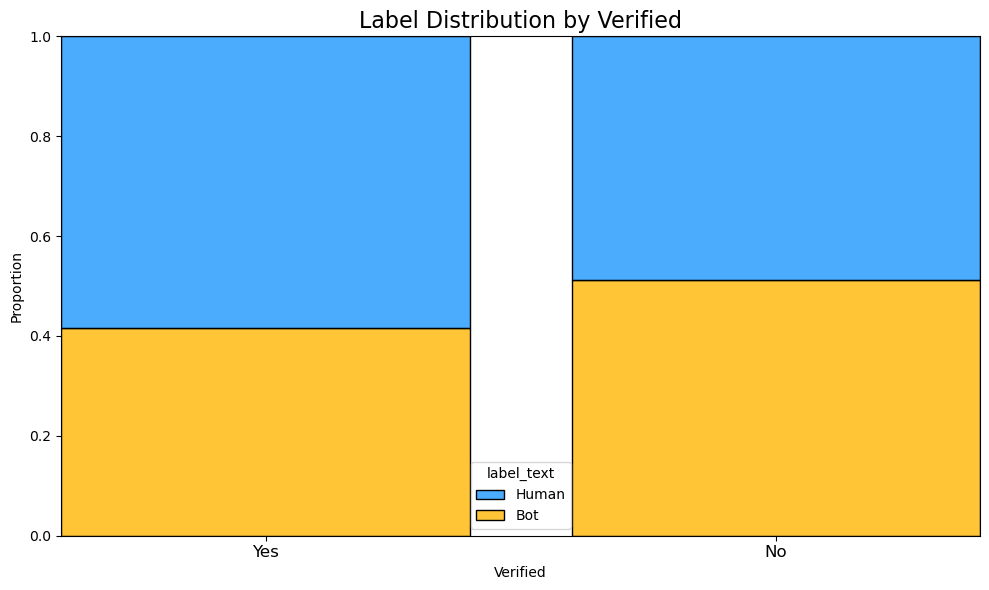

In [32]:
plot_column_vs_label(train_combined, "verified")

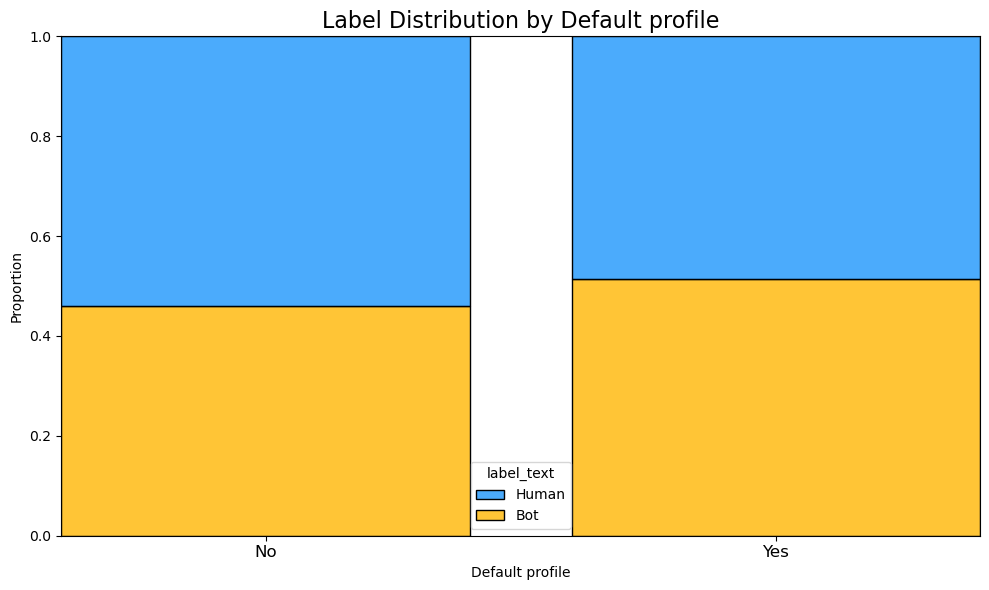

In [33]:
plot_column_vs_label(train_combined, "default_profile")

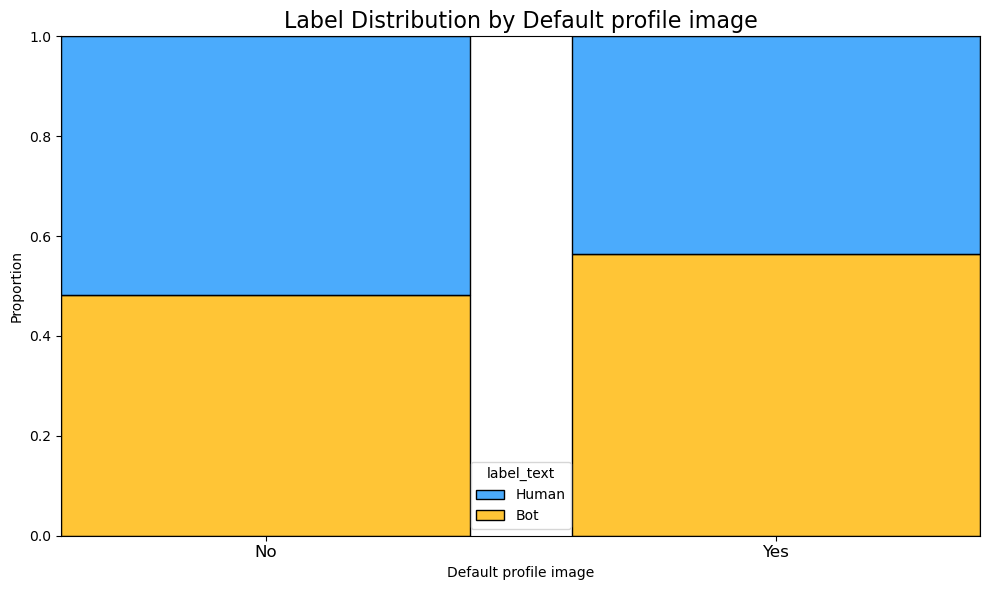

In [34]:
plot_column_vs_label(train_combined, "default_profile_image")

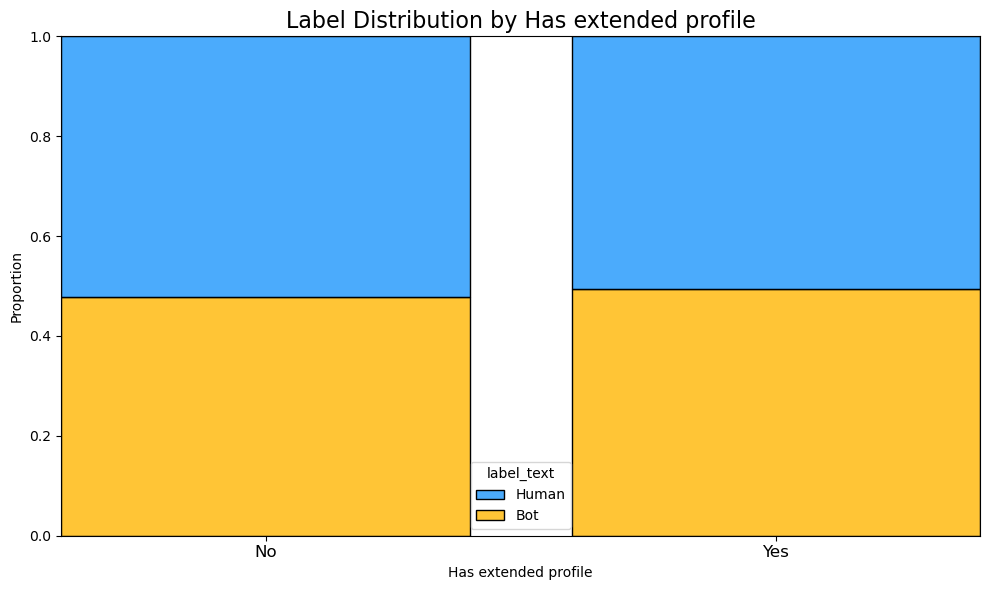

In [35]:
plot_column_vs_label(train_combined, "has_extended_profile")

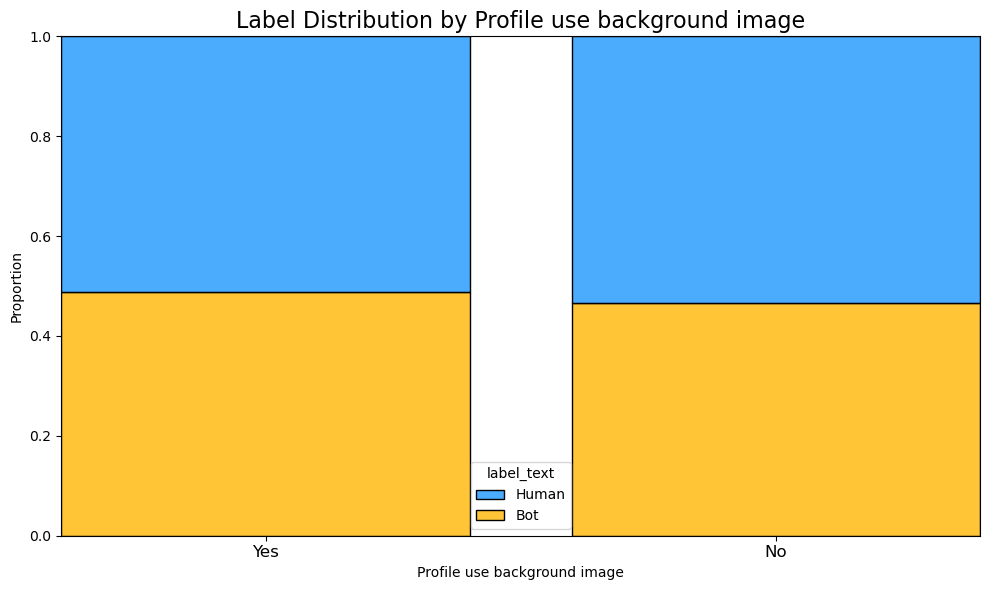

In [36]:
plot_column_vs_label(train_combined, "profile_use_background_image")